 #  A Whale off the Port(folio)
 ---

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P 500 Index.

In [1]:
# Initial imports
import pandas as pd
import numpy as np
import datetime as dt
import seaborn as sns
from pathlib import Path

%matplotlib inline

# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:

* `whale_returns.csv`: Contains returns of some famous "whale" investors' portfolios.

* `algo_returns.csv`: Contains returns from the in-house trading algorithms from Harold's company.

* `sp500_history.csv`: Contains historical closing prices of the S&P 500 Index.

## Whale Returns

Read the Whale Portfolio daily returns and clean the data

In [2]:
# Reading whale returns
whale_path = Path("Resources/whale_returns.csv")
whale_df = pd.read_csv(whale_path, index_col='Date', parse_dates=True, infer_datetime_format=True)
whale_df.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-02,NaN,NaN,NaN,NaN
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098


In [3]:
# Count nulls
whale_df.isnull().sum()

SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64

In [4]:
# Drop nulls
whale_df.dropna(inplace=True)
whale_df.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098
2015-03-09,0.000582,0.004225,0.005843,-0.001652


## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data

In [5]:
# Reading algorithmic returns
algo_path = Path("Resources/algo_returns.csv")
algo_df = pd.read_csv(algo_path, index_col='Date', parse_dates=True, infer_datetime_format=True)
algo_df.head()

,Algo 1,Algo 2
Date,,
2014-05-28,0.001745,NaN
2014-05-29,0.003978,NaN
2014-05-30,0.004464,NaN
2014-06-02,0.005692,NaN
2014-06-03,0.005292,NaN


In [8]:
# Count nulls
algo_df.isnull().sum()

Algo 1    0
Algo 2    0
dtype: int64

In [9]:
# Drop nulls
algo_df.dropna(inplace=True)
algo_df.head()

,Algo 1,Algo 2
Date,,
2014-06-05,0.004062,0.013285
2014-06-06,0.001857,0.008284
2014-06-09,-0.005012,0.005668
2014-06-10,0.004406,-0.000735
2014-06-11,0.004760,-0.003761


## S&P 500 Returns

Read the S&P 500 historic closing prices and create a new daily returns DataFrame from the data. 

In [10]:
# Reading S&P 500 Closing Prices
sp500_path = Path("Resources/sp500_history.csv")
sp500_df = pd.read_csv(sp500_path, index_col='Date', parse_dates=True, infer_datetime_format=True)
sp500_df.head()

,Close
Date,
2019-04-23,$2933.68
2019-04-22,$2907.97
2019-04-18,$2905.03
2019-04-17,$2900.45
2019-04-16,$2907.06


In [11]:
# Check Data Types
sp500_df.dtypes

Close    object
dtype: object

In [12]:
# Fix Data Types
sp500_df['Close'] = sp500_df['Close'].str.replace("$","")

# Convert `Close` from `object` to `float`
sp500_df['Close'] = sp500_df['Close'].astype("float")

#sort by date
sp500_df.sort_index(ascending=True, inplace=True)

#check types
sp500_df.dtypes

sp500_df.head()

,Close
Date,
2012-10-01,1444.49
2012-10-02,1445.75
2012-10-03,1450.99
2012-10-04,1461.40
2012-10-05,1460.93


#### The whale portfolios and algorithmic portfolio CSV files contain daily returns, but the S&P 500 CSV file contains closing prices. Convert the S&P 500 closing prices to daily returns.

In [13]:
# Calculate Daily Returns
sp500_returns = sp500_df.pct_change()

In [14]:
# Drop nulls
sp500_returns.dropna(inplace=True)

In [15]:
# Rename `Close` Column to be specific to this portfolio.
sp500_returns.columns = ['S&P500']
sp500_returns.head()

,S&P500
Date,
2012-10-02,0.000872
2012-10-03,0.003624
2012-10-04,0.007174
2012-10-05,-0.000322
2012-10-08,-0.003457


## Combine Whale, Algorithmic, and S&P 500 Returns

In [16]:
# Join Whale Returns, Algorithmic Returns, and the S&P 500 Returns into a single DataFrame with columns for each portfolio's returns.
daily_returns = pd.concat([whale_df, algo_df, sp500_returns], axis='columns',join='inner')
daily_returns.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P500
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,-0.004539
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.004389
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.001196
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.014174
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,0.003944


---

# Conduct Quantitative Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance Anlysis

#### Calculate and Plot the daily returns.

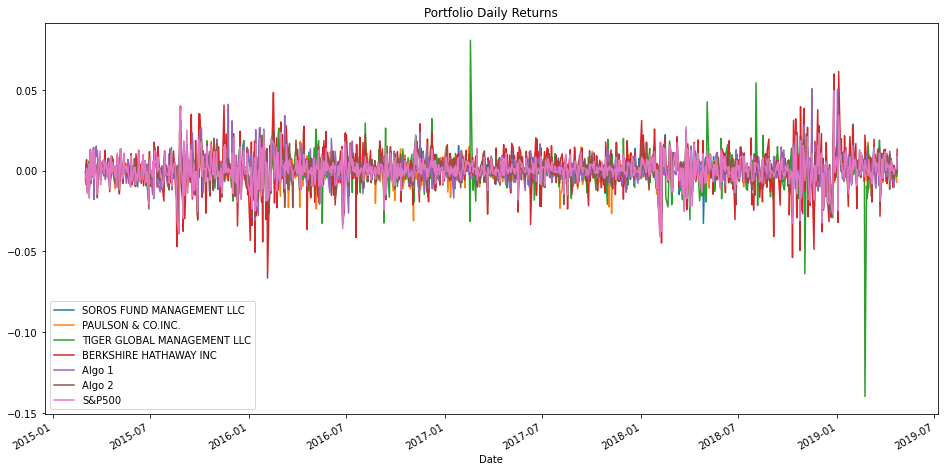

In [17]:
# Plot daily returns of all portfolios
daily_returns.plot(figsize=(16,8), title='Portfolio Daily Returns',)


#### Calculate and Plot cumulative returns.

In [18]:
#display column names
daily_returns.columns

Index(['SOROS FUND MANAGEMENT LLC', 'PAULSON & CO.INC. ',
       'TIGER GLOBAL MANAGEMENT LLC', 'BERKSHIRE HATHAWAY INC', 'Algo 1',
       'Algo 2', 'S&P500'],
      dtype='object')

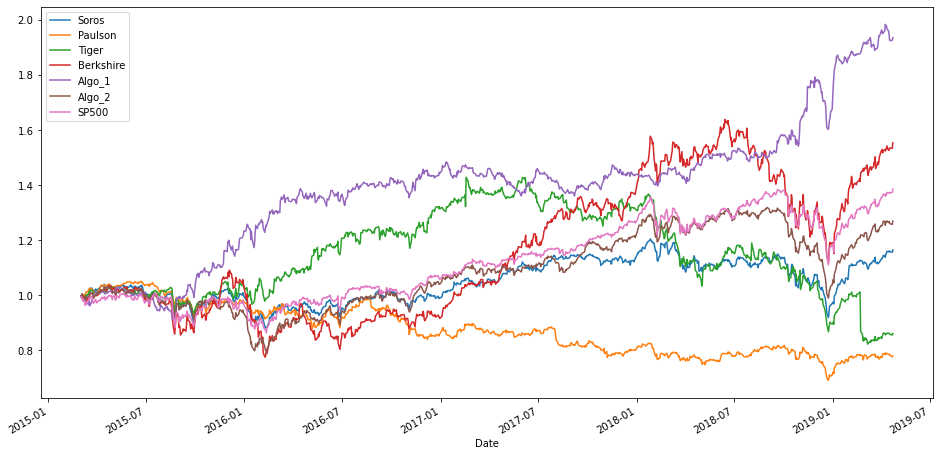

In [19]:
# Calculate cumulative returns of all portfolios
cumulative_returns = pd.DataFrame(columns=['Soros','Paulson','Tiger','Berkshire','Algo_1','Algo_2','SP500'])
cumulative_returns['Soros'] = (1 + daily_returns['SOROS FUND MANAGEMENT LLC']).cumprod()
cumulative_returns['Paulson'] = (1 + daily_returns['PAULSON & CO.INC. ']).cumprod()
cumulative_returns['Tiger'] = (1 + daily_returns["TIGER GLOBAL MANAGEMENT LLC"]).cumprod()
cumulative_returns['Berkshire'] = (1 + daily_returns['BERKSHIRE HATHAWAY INC']).cumprod()
cumulative_returns['Algo_1'] = (1 + daily_returns['Algo 1']).cumprod()
cumulative_returns['Algo_2'] = (1 + daily_returns['Algo 2']).cumprod()
cumulative_returns['SP500'] = (1 + daily_returns['S&P500']).cumprod()

# Plot cumulative returns
cumulative_returns.plot(figsize=(16,8))


---

## Risk Analysis

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios
4. Determine which portfolios are riskier than the S&P 500
5. Calculate the Annualized Standard Deviation

### Create a box plot for each portfolio


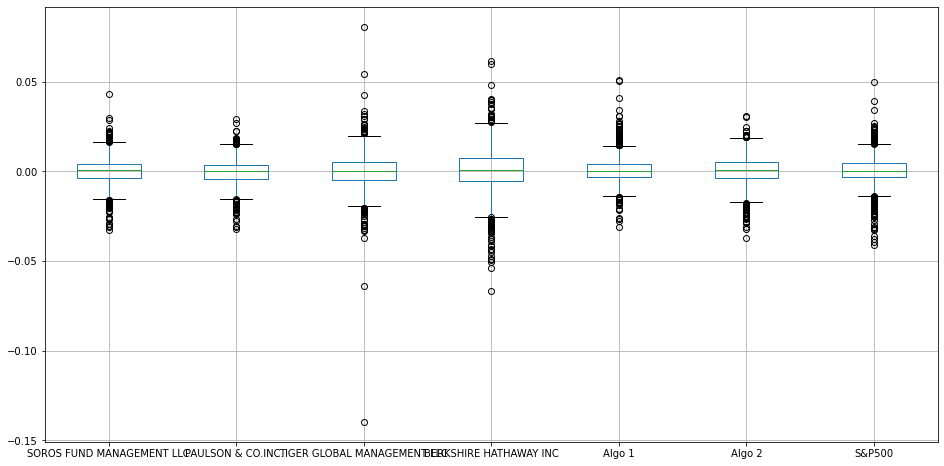

In [20]:
# Box plot to visually show risk
daily_returns.boxplot(figsize=(16,8))

### Calculate Standard Deviations

In [21]:
# Calculate the daily standard deviations of all portfolios
daily_returns_std = daily_returns.std().sort_values(ascending=False)
daily_returns_std

BERKSHIRE HATHAWAY INC         0.012919
TIGER GLOBAL MANAGEMENT LLC    0.010894
S&P500                         0.008554
Algo 2                         0.008342
SOROS FUND MANAGEMENT LLC      0.007895
Algo 1                         0.007620
PAULSON & CO.INC.              0.007023
dtype: float64

### Determine which portfolios are riskier than the S&P 500

The daily standard deviation of the S&P500 is 0.008553731597758204

The two porfolios risker than S&P500 are: 
BERKSHIRE HATHAWAY INC         0.012919
TIGER GLOBAL MANAGEMENT LLC    0.010894
dtype: float64



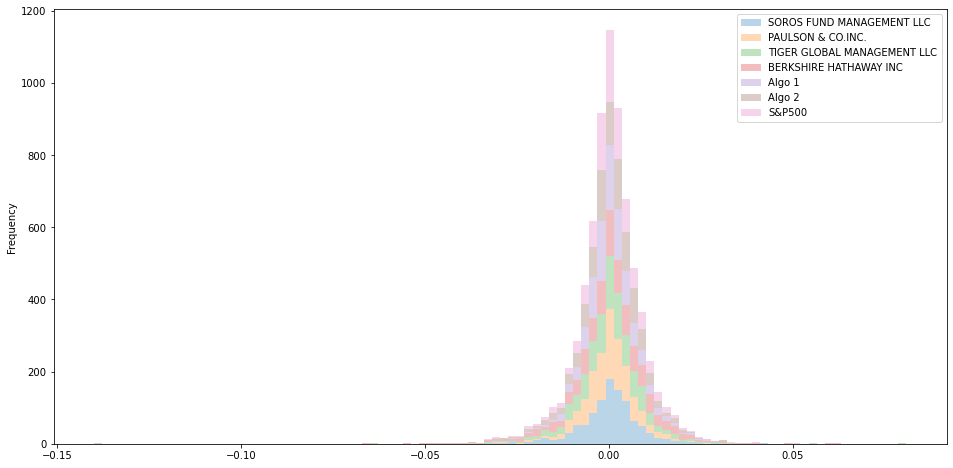

In [22]:
# Calculate  the daily standard deviation of S&P 500
print(f"The daily standard deviation of the S&P500 is {daily_returns_std['S&P500']}\n")

# Determine which portfolios are riskier than the S&P 500
print(f'The two porfolios risker than S&P500 are: \n{daily_returns_std[0:2]}\n');

# Identify the stock with the most risk
daily_returns.plot.hist(stacked=True,bins=100, alpha=.3, figsize=(16,8));

### Calculate the Annualized Standard Deviation

In [308]:
# Calculate the annualized standard deviation (252 trading days)
annualized_std = daily_returns_std * np.sqrt(252)
annualized_std.head()

BERKSHIRE HATHAWAY INC         0.205077
TIGER GLOBAL MANAGEMENT LLC    0.172936
S&P500                         0.135786
Algo 2                         0.132430
SOROS FUND MANAGEMENT LLC      0.125335
dtype: float64

---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Calculate and plot the rolling standard deviation for the S&P 500 using a 21-day window
2. Calculate the correlation between each stock to determine which portfolios may mimick the S&P 500
3. Choose one portfolio, then calculate and plot the 60-day rolling beta between it and the S&P 500

### Calculate and plot rolling `std` for all portfolios with 21-day window

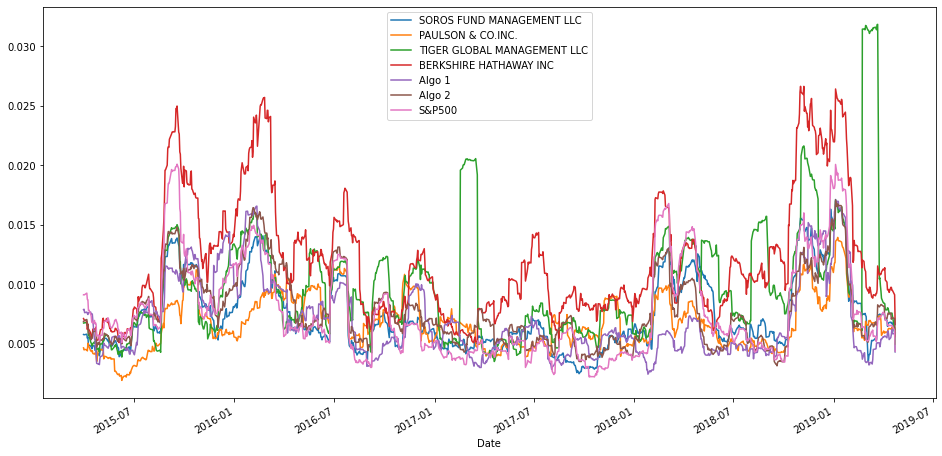

In [309]:
# Calculate the rolling standard deviation for all portfolios using a 21-day window
rolling_standard_deviation = daily_returns.rolling(window=21).std()

# Plot the rolling standard deviation
rolling_standard_deviation.plot(figsize=(16,8))


### Calculate and plot the correlation

In [310]:
# Calculate the correlation
correlation = daily_returns.corr()

# Display de correlation matrix
correlation

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P500
SOROS FUND MANAGEMENT LLC,1.000000,0.699914,0.561243,0.754360,0.321211,0.826873,0.837864
PAULSON & CO.INC.,0.699914,1.000000,0.434479,0.545623,0.268840,0.678152,0.669732
TIGER GLOBAL MANAGEMENT LLC,0.561243,0.434479,1.000000,0.424423,0.164387,0.507414,0.623946
BERKSHIRE HATHAWAY INC,0.754360,0.545623,0.424423,1.000000,0.292033,0.688082,0.751371
Algo 1,0.321211,0.268840,0.164387,0.292033,1.000000,0.288243,0.279494
Algo 2,0.826873,0.678152,0.507414,0.688082,0.288243,1.000000,0.858764
S&P500,0.837864,0.669732,0.623946,0.751371,0.279494,0.858764,1.000000


### Calculate and Plot Beta for a chosen portfolio and the S&P 500

In [311]:
daily_returns.columns

Index(['SOROS FUND MANAGEMENT LLC', 'PAULSON & CO.INC. ',
       'TIGER GLOBAL MANAGEMENT LLC', 'BERKSHIRE HATHAWAY INC', 'Algo 1',
       'Algo 2', 'S&P500'],
      dtype='object')

In [312]:
# Calculate covariance of a single portfolio
covariance = daily_returns['BERKSHIRE HATHAWAY INC'].cov(daily_returns['S&P500'])
covariance

8.302834941861692e-05

In [313]:
# Calculate variance of S&P 500
variance = daily_returns['S&P500'].var()
variance

7.316632424648712e-05

In [314]:
# Computing beta
beta = covariance / variance
beta

1.1347891297491728

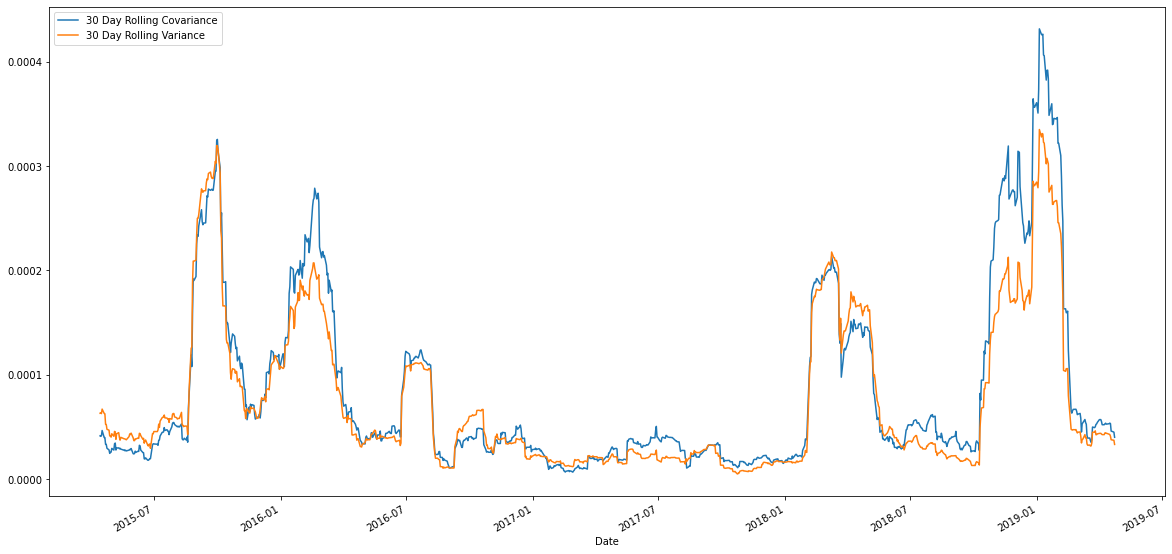

In [37]:
# Plot beta trend

portfolio = 'BERKSHIRE HATHAWAY INC'

# Calculate 30-day rolling covariance of porfolio vs. S&P 500 and plot the data
rolling_covariance = daily_returns[portfolio].rolling(window=30).cov(daily_returns['S&P500'])
ax = rolling_covariance.plot(figsize=(20, 10))

# Calculate 30-day rolling variance of portfolio vs. S&P 500 and plot the data
rolling_variance = daily_returns['S&P500'].rolling(window=30).var()
rolling_variance.plot(ax=ax);

ax.legend(['30 Day Rolling Covariance', '30 Day Rolling Variance'])

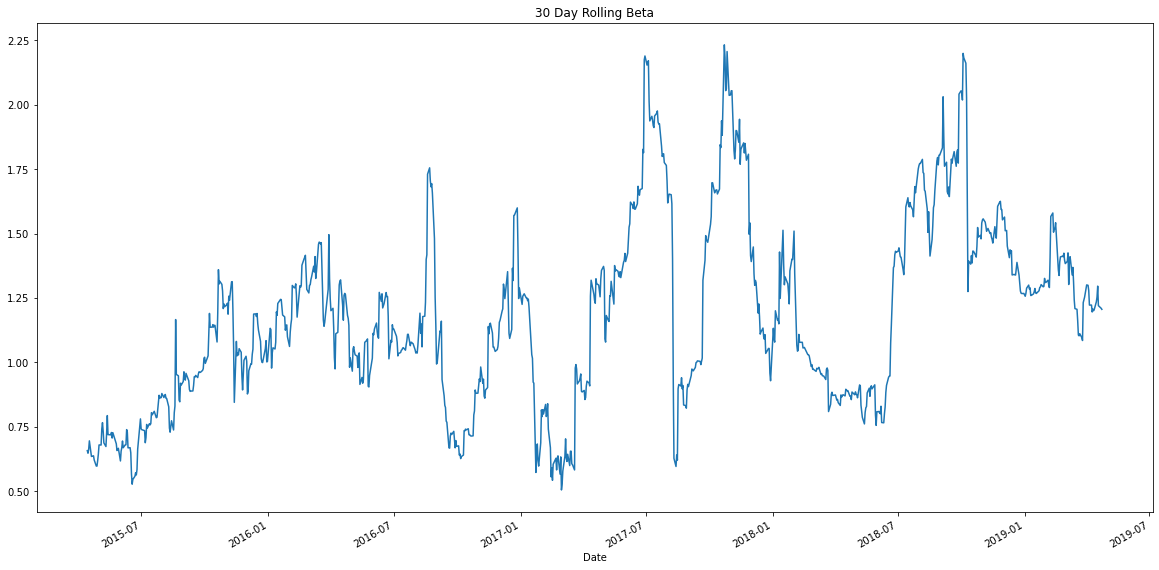

In [38]:
# Calculate 30-day rolling beta of porfolio and plot the data
rolling_beta = rolling_covariance / rolling_variance
rolling_beta.plot(figsize=(20,10), title='30 Day Rolling Beta');


## Rolling Statistics Challenge: Exponentially Weighted Average 

An alternative way to calculate a rolling window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the [`ewm`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.ewm.html) with a 21-day half-life.

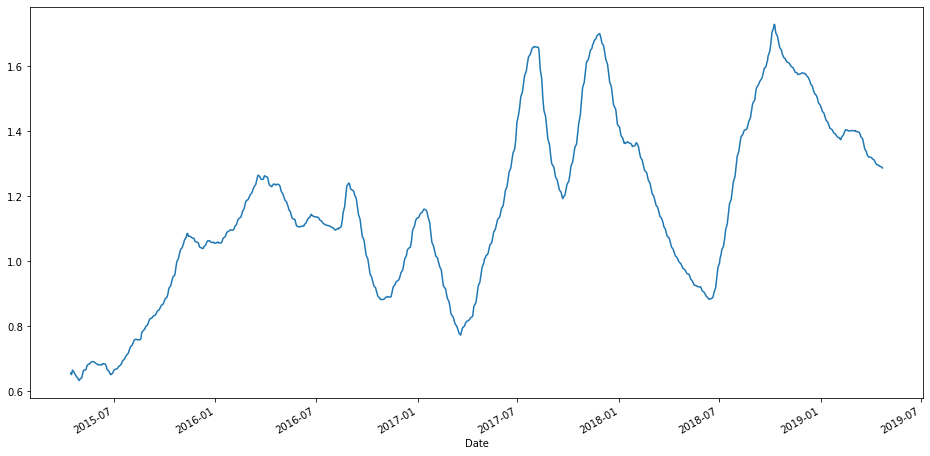

In [39]:
# Use `ewm` to calculate the rolling window
rolling_beta.ewm(halflife=21).mean().plot(figsize=(16,8))

---

# Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. After all, if you could invest in one of two portfolios, and each offered the same 10% return, yet one offered lower risk, you'd take that one, right?

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [40]:
# Annualized Sharpe Ratios
# Calculate Sharpe Ratio
sharpe_ratios = (daily_returns.mean() * 252) / (daily_returns.std() * np.sqrt(252))
sharpe_ratios.sort_values()

PAULSON & CO.INC.             -0.483570
TIGER GLOBAL MANAGEMENT LLC   -0.121060
SOROS FUND MANAGEMENT LLC      0.356417
Algo 2                         0.501364
BERKSHIRE HATHAWAY INC         0.621810
S&P500                         0.648267
Algo 1                         1.378648
dtype: float64

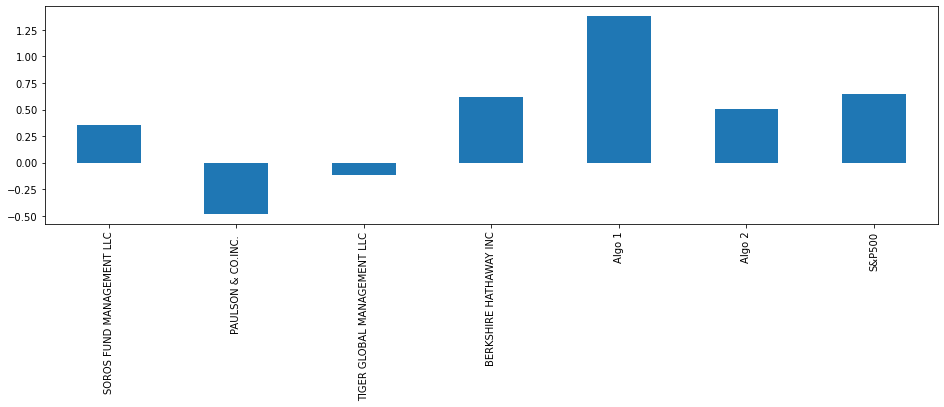

In [41]:
# Visualize the sharpe ratios as a bar plot
sharpe_ratios.plot(kind='bar', figsize=(16,4))

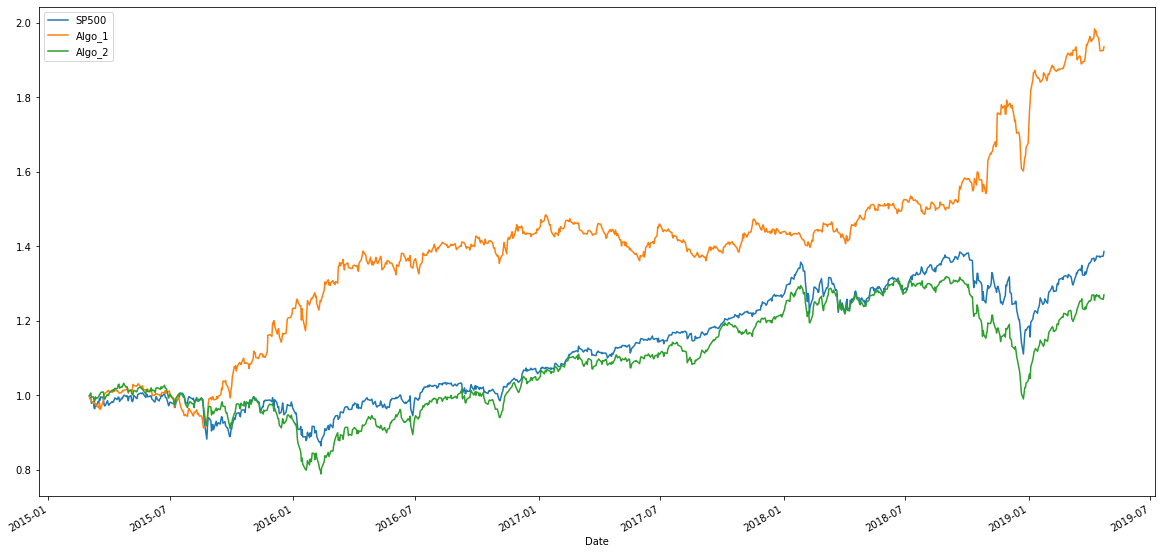

In [47]:
# Plot SP500 vs Algo returns
cumulative_returns[['SP500','Algo_1','Algo_2']].plot(figsize=(20,10))

### Determine whether the algorithmic strategies outperform both the market (S&P 500) and the whales portfolios.

Write your answer here!

- Algo 1 performs better than all other porftoflios in the SP500 and Whales and Algo2
- Algo 2 performs better than Paulson, Tiger, Soros but under performs agains the SP500 and Berkshire and Algo1

---

# Create Custom Portfolio

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P 500. 

1. Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.
2. Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock
3. Join your portfolio returns to the DataFrame that contains all of the portfolio returns
4. Re-run the performance and risk analysis with your portfolio to see how it compares to the others
5. Include correlation analysis to determine which stocks (if any) are correlated

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

For this demo solution, we fetch data from three companies listes in the S&P 500 index.

* `GOOG` - [Google, LLC](https://en.wikipedia.org/wiki/Google)

* `AAPL` - [Apple Inc.](https://en.wikipedia.org/wiki/Apple_Inc.)

* `COST` - [Costco Wholesale Corporation](https://en.wikipedia.org/wiki/Costco)

In [86]:
# Reading data from 1st stock
goog = pd.read_csv('Resources/goog_historical.csv', index_col='Trade DATE', parse_dates=True)
goog.head()

,Symbol,NOCP
Trade DATE,,
2019-05-09,GOOG,1162.38
2019-05-08,GOOG,1166.27
2019-05-07,GOOG,1174.10
2019-05-06,GOOG,1189.39
2019-05-03,GOOG,1185.40


In [87]:
# Reading data from 2nd stock
aapl = pd.read_csv('Resources/aapl_historical.csv', index_col='Trade DATE', parse_dates=True)
aapl.head()

,Symbol,NOCP
Trade DATE,,
2019-05-09,AAPL,200.72
2019-05-08,AAPL,202.90
2019-05-07,AAPL,202.86
2019-05-06,AAPL,208.48
2019-05-03,AAPL,211.75


In [88]:
# Reading data from 3rd stock
cost = pd.read_csv('Resources/cost_historical.csv', index_col='Trade DATE', parse_dates=True)
cost.head()

,Symbol,NOCP
Trade DATE,,
2019-05-09,COST,243.47
2019-05-08,COST,241.34
2019-05-07,COST,240.18
2019-05-06,COST,244.23
2019-05-03,COST,244.62


In [89]:
# Combine all stocks in a single DataFrame
custom_portfolio = pd.concat([goog,aapl,cost], axis='rows', join='inner')


In [90]:
# Reset Date index
custom_portfolio = custom_portfolio.reset_index()
custom_portfolio.head()

,Trade DATE,Symbol,NOCP
0,2019-05-09,GOOG,1162.38
1,2019-05-08,GOOG,1166.27
2,2019-05-07,GOOG,1174.10
3,2019-05-06,GOOG,1189.39
4,2019-05-03,GOOG,1185.40


In [91]:
# Reorganize portfolio data by having a column per symbol
custom_portfolio = custom_portfolio.pivot_table(values='NOCP',index='Trade DATE', columns='Symbol')
custom_portfolio.sort_index(inplace=True)
custom_portfolio.head()

Symbol,AAPL,COST,GOOG
Trade DATE,,,
2018-05-11,188.59,195.76,1098.26
2018-05-14,188.15,195.88,1100.20
2018-05-15,186.44,195.48,1079.23
2018-05-16,188.18,198.71,1081.77
2018-05-17,186.99,199.60,1078.59


In [92]:
# Calculate daily returns
cust_port_daily_returns = custom_portfolio.pct_change()
cust_port_daily_returns.sort_index(inplace=True)

# Drop NAs
cust_port_daily_returns.dropna(inplace=True)


# Display sample data
cust_port_daily_returns.head()


Symbol,AAPL,COST,GOOG
Trade DATE,,,
2018-05-14,-0.002333,0.000613,0.001766
2018-05-15,-0.009088,-0.002042,-0.019060
2018-05-16,0.009333,0.016523,0.002354
2018-05-17,-0.006324,0.004479,-0.002940
2018-05-18,-0.003637,-0.003206,-0.011339


## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [93]:
# Set weights
weights = [1/3, 1/3, 1/3]

# Calculate portfolio return
cust_portfolio_returns = cust_port_daily_returns.dot(weights)


## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [94]:
# Join your returns DataFrame to the original returns DataFrame
daily_returns['Custom'] = cust_portfolio_returns

In [95]:
## Only compare dates where return data exists for all the stocks (drop NaNs)
daily_returns.dropna(inplace=True)
daily_returns.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P500,Custom
Date,,,,,,,,
2018-05-14,0.000000,0.000000,0.000000,0.000000,0.000915,0.001635,0.000884,0.000015
2018-05-15,-0.000726,-0.001409,-0.003189,-0.014606,-0.001135,-0.001139,-0.006842,-0.010064
2018-05-16,0.008637,0.006244,0.005480,0.004310,-0.002326,0.003341,0.004061,0.009403
2018-05-17,-0.001955,0.002524,-0.006267,-0.005140,-0.006949,0.005205,-0.000856,-0.001595
2018-05-18,-0.004357,-0.002672,-0.012832,-0.002212,0.002557,-0.002496,-0.002632,-0.006061


## Re-run the risk analysis with your portfolio to see how it compares to the others

### Calculate the Annualized Standard Deviation

In [96]:
# Calculate the annualized `std`
#daily_returns_std = daily_returns.std().sort_values(ascending=False)
annualized_std = daily_returns.std().sort_values(ascending=False) * np.sqrt(252)
#annualized_std.sort_values(ascending=True)
annualized_std.head(10)

BERKSHIRE HATHAWAY INC         0.247155
TIGER GLOBAL MANAGEMENT LLC    0.232531
Custom                         0.211496
S&P500                         0.152054
SOROS FUND MANAGEMENT LLC      0.146675
Algo 2                         0.139556
Algo 1                         0.133704
PAULSON & CO.INC.              0.116732
dtype: float64

### Calculate and plot rolling `std` with 21-day window

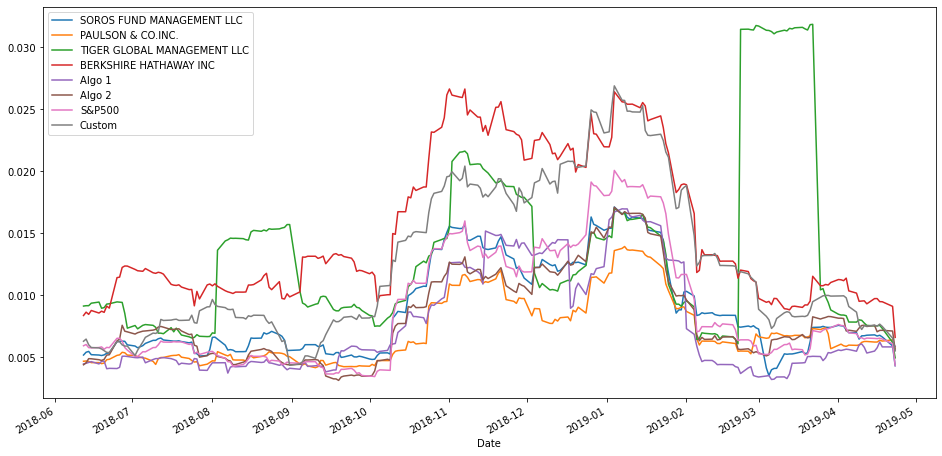

In [97]:
# Calculate rolling standard deviation
rolling_standard_deviation = daily_returns.rolling(window=21).std()

# Plot rolling standard deviation
rolling_standard_deviation.plot(figsize=(16,8));

### Calculate and plot the correlation

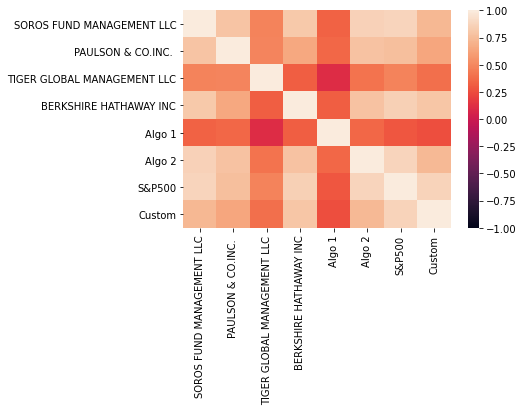

In [98]:
# Calculate the correlation
correlation = daily_returns.corr()

# Display de correlation matrix
sns.heatmap(correlation, vmin=-1, vmax=1)

In [99]:
correlation

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P500,Custom
SOROS FUND MANAGEMENT LLC,1.000000,0.791962,0.478627,0.816675,0.337826,0.862846,0.876981,0.733250
PAULSON & CO.INC.,0.791962,1.000000,0.485375,0.650758,0.361301,0.783656,0.766680,0.644210
TIGER GLOBAL MANAGEMENT LLC,0.478627,0.485375,1.000000,0.325457,0.114554,0.409496,0.481030,0.391972
BERKSHIRE HATHAWAY INC,0.816675,0.650758,0.325457,1.000000,0.327000,0.782804,0.852303,0.801158
Algo 1,0.337826,0.361301,0.114554,0.327000,1.000000,0.365512,0.289358,0.261471
Algo 2,0.862846,0.783656,0.409496,0.782804,0.365512,1.000000,0.875721,0.739936
S&P500,0.876981,0.766680,0.481030,0.852303,0.289358,0.875721,1.000000,0.871875
Custom,0.733250,0.644210,0.391972,0.801158,0.261471,0.739936,0.871875,1.000000


### Calculate and Plot Rolling 60-day Beta for Your Portfolio compared to the S&P 500

Covariance for Custom Portfolio is 0.00011126340361673004
Variance for S&P500 is 9.17475896298873e-05
Beta is = 1.2127120076458702


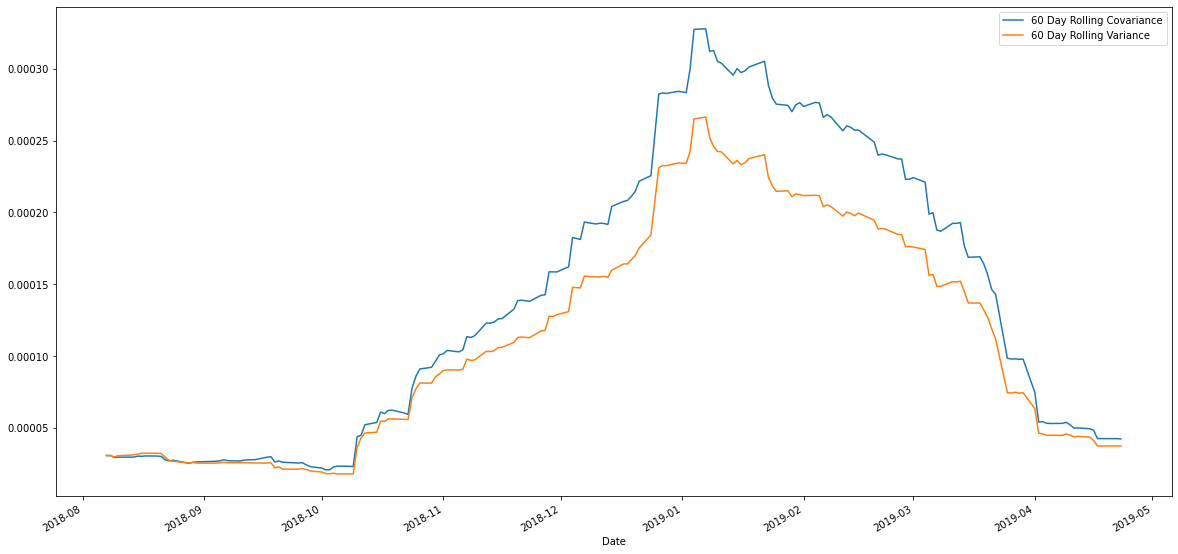

In [100]:
# Calculate covariance of a single portfolio
covariance = daily_returns['Custom'].cov(daily_returns['S&P500'])
print(f'Covariance for Custom Portfolio is {covariance}')

# Calculate variance of S&P 500
variance = daily_returns['S&P500'].var()
print(f'Variance for S&P500 is {variance}')

# Computing beta
beta = covariance / variance
print(f'Beta is = {beta}')


# Plot beta trend

portfolio = 'Custom'

# Calculate 60-day rolling covariance of porfolio vs. S&P 500 and plot the data
rolling_covariance = daily_returns[portfolio].rolling(window=60).cov(daily_returns['S&P500'])
ax = rolling_covariance.plot(figsize=(20, 10))

# Calculate 60-day rolling variance of portfolio vs. S&P 500 and plot the data
rolling_variance = daily_returns['S&P500'].rolling(window=60).var()
rolling_variance.plot(ax=ax)

ax.legend(['60 Day Rolling Covariance', '60 Day Rolling Variance'])

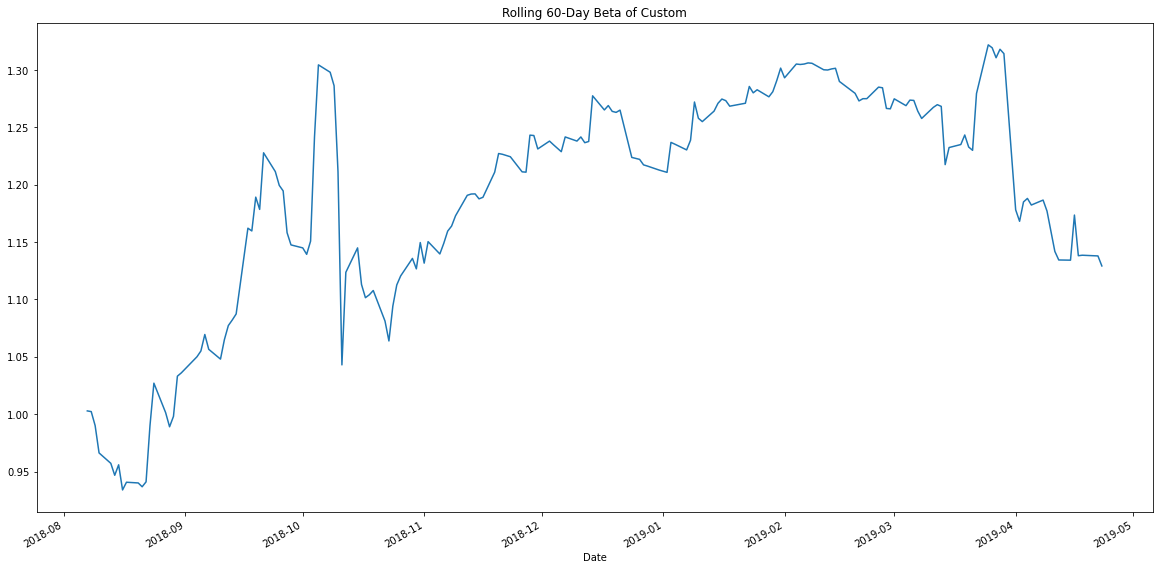

In [101]:
# Calculate 60-day rolling beta of porfolio and plot the data
rolling_beta = rolling_covariance / rolling_variance
rolling_beta.plot(figsize=(20, 10), title='Rolling 60-Day Beta of ' + portfolio);

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [102]:
# Calculate Annualzied Sharpe Ratios
sharpe_ratios = (daily_returns.mean() * 252) / (daily_returns.std() * np.sqrt(252))
sharpe_ratios.sort_values()


TIGER GLOBAL MANAGEMENT LLC   -1.034216
Algo 2                         0.080607
BERKSHIRE HATHAWAY INC         0.159756
PAULSON & CO.INC.              0.258738
SOROS FUND MANAGEMENT LLC      0.430713
S&P500                         0.584820
Custom                         0.933123
Algo 1                         2.035665
dtype: float64

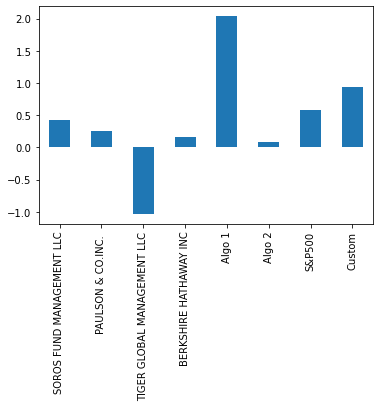

In [103]:
# Visualize the sharpe ratios as a bar plot
sharpe_ratios.plot(kind='bar')

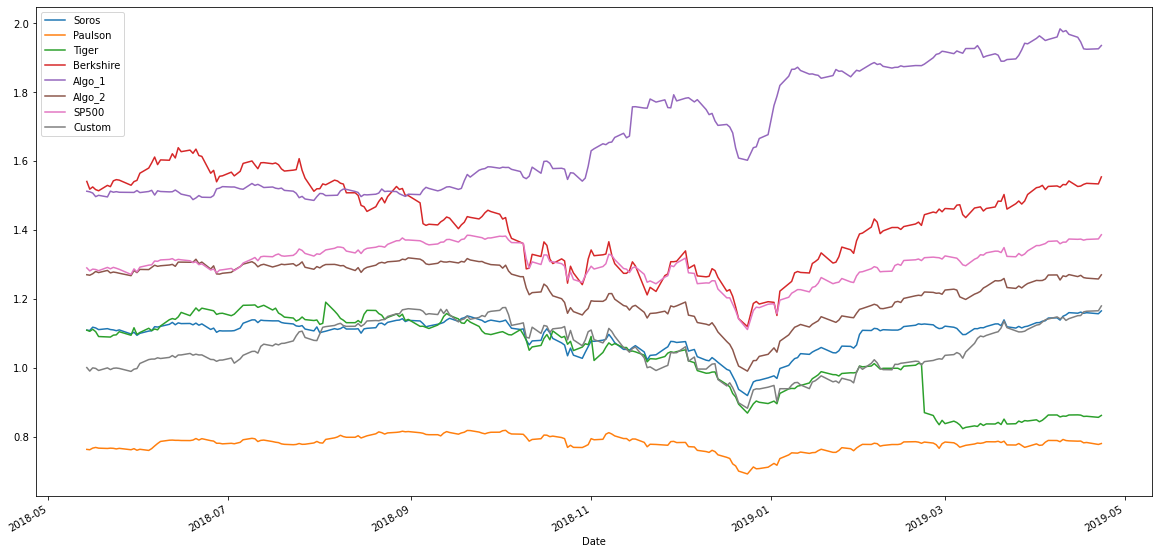

In [104]:
cumulative_returns['Custom'] = (1 + daily_returns['Custom']).cumprod()
cumulative_returns.dropna(inplace=True)
cumulative_returns.plot(figsize=(20,10))

### How does your portfolio do?

Write your answer here!

A few observations.

- High Volatility with low return.

- Despite having a higher sharpe ratio it's performance is lower than Algo2, SP500, Algo1